**2. Local histogram equalization**

In [39]:
#importing required libraries
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


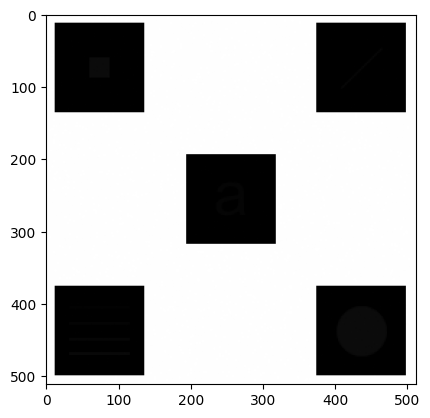

In [41]:
#reading the input image
input_img = cv2.imread('/content/drive/MyDrive/DIP/assignment 2/prob2.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(input_img, 'gray')

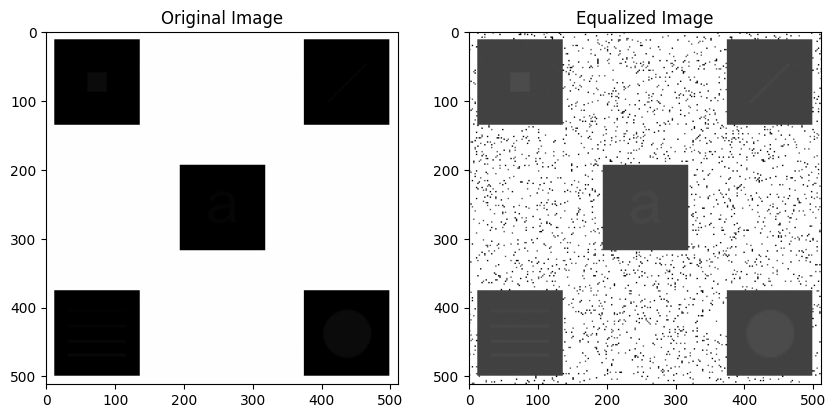

In [42]:
# Calculate the input histogram
input_histogram, bins = np.histogram(input_img.flatten(), 256, [0, 256])

#Calculating cumulative distribution functions
cdf = input_histogram.cumsum()

#Normalizing the CDF
cdf_normalized = (cdf * 256) / (input_img.shape[0] * input_img.shape[1])

equalized_img = np.interp(input_img.flatten(), bins[:-1], cdf_normalized)
equalized_img = equalized_img.reshape(input_img.shape).astype(np.uint8)

#Displaying the original and equalized image to compare
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axis[0].imshow(input_img, cmap='gray')
axis[0].set_title('Original Image')
axis[1].imshow(equalized_img, cmap='gray')
axis[1].set_title('Equalized Image')
plt.show()

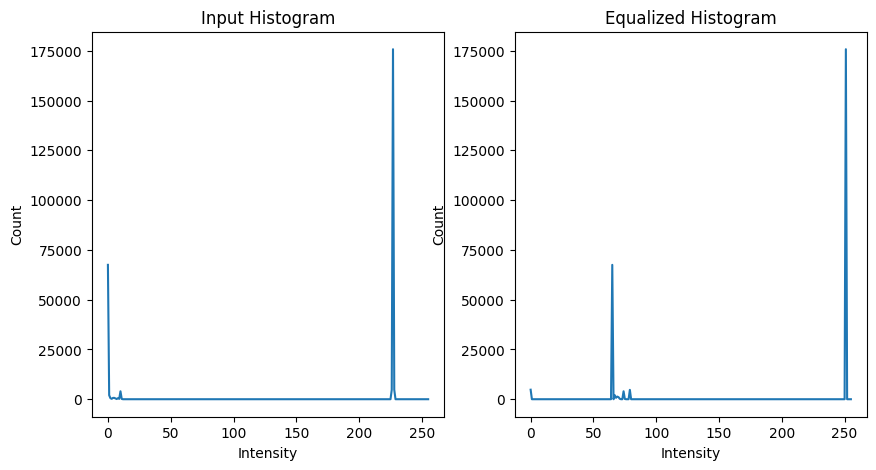

In [43]:
#Calculating the output histogram
hist_eq, bins_eq = np.histogram(equalized_img.flatten(), 256, [0, 256])

#Plotting the input and output histograms as line graphs
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].plot(input_histogram)
axis[0].set_title('Input Histogram')
axis[0].set_xlabel('Intensity')
axis[0].set_ylabel('Count')
axis[1].plot(hist_eq)
axis[1].set_title('Equalized Histogram')
axis[1].set_xlabel('Intensity')
axis[1].set_ylabel('Count')
plt.show()

Performed global histogram equalization on the input image. From the output image we can see the letters and symbols that are in the black boxes which were not visible in the input image. We can look at both the input and equalized histogram, the resulting equalized_img has a more balanced histogram, which can enhance the contrast and improve the visual appearance of the image.

Text(0.5, 1.0, 'Output Image')

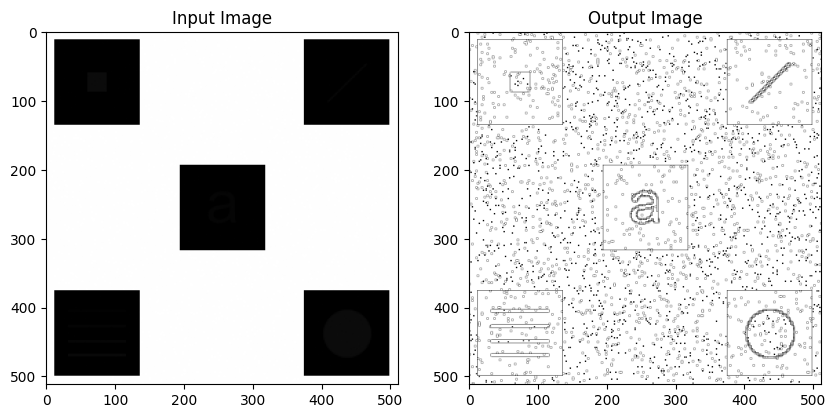

In [44]:
#Defining the size of the neighborhood
neighborhood_size = 3

#Computing the padding required for the neighborhood
pad_size = neighborhood_size // 2

#Doing Zero Padding for the input image
padded_img = cv2.copyMakeBorder(input_img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)

#Output iamge same size as input image
output_img = np.zeros_like(input_img)

#Computing the histogram of the neighborhood for each pixel in the image
for i in range(pad_size, padded_img.shape[0] - pad_size):
    for j in range(pad_size, padded_img.shape[1] - pad_size):
        neighborhood = padded_img[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
        hist, _ = np.histogram(neighborhood, bins=256, range=(0, 255))
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf.max()
        output_img[i - pad_size, j - pad_size] = cdf_normalized[padded_img[i, j]] * 255

output_img = output_img.astype(np.uint8)

#Plotting the input and output images to compare
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(input_img, cmap='gray')
axs[0].set_title('Input Image')
axs[1].imshow(output_img, cmap='gray')
axs[1].set_title('Output Image')

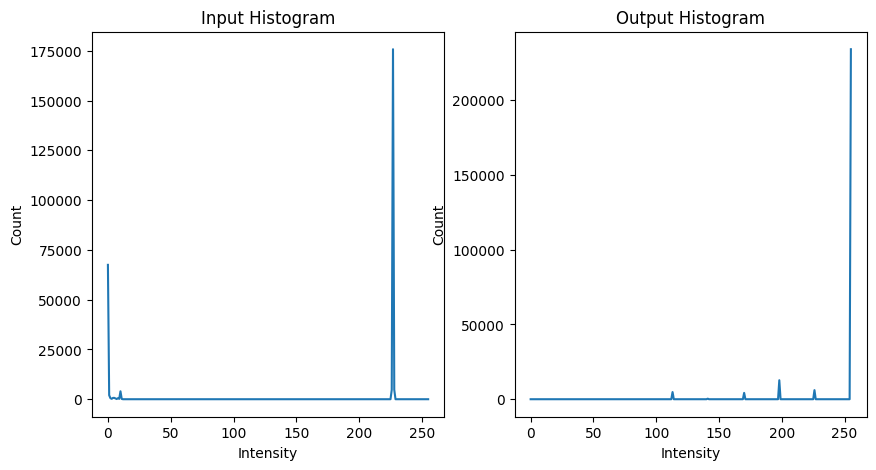

In [45]:
#Calculating the output histogram
localhistogram_equalized, bins_eq = np.histogram(output_img.flatten(), 256, [0, 256])

#Plotting the input and output histograms as line graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(input_histogram)
ax[0].set_title('Input Histogram')
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Count')
ax[1].plot(localhistogram_equalized)
ax[1].set_title('Output Histogram')
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Count')
plt.show()

We are using local histogram equalization on the input image, in the output image we can see that all the black or darker regions in the image are not there anymore, we can see the lighter areas and the image is equalized. It improved the contrast and enhanced the local details in the image. It divided the image into small regions and applies histogram equalization to each region. 